In [1]:

import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

bought_price = 16


In [2]:
#stock analysis 

start = datetime.datetime(2022,2,1)
end = datetime.datetime(2022,5,20)

#for future stocks 

from datetime import datetime, timedelta
start_date = datetime(2022, 5, 27)
end_date = datetime(2022, 8, 27)
    
dates = pd.date_range(start_date,end_date-timedelta(days=1),freq='d')



In [3]:
stock = [] 
i = 'AAL'
stock = yf.download(i, start = start, end = end, progress = False) 

In [4]:
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,16.559999,16.969999,16.410000,16.830000,16.830000,30798800
2022-02-02,16.879999,17.150000,16.490000,16.959999,16.959999,37904200
2022-02-03,16.650000,17.180000,16.549999,16.570000,16.570000,30642800
2022-02-04,16.540001,16.570000,16.040001,16.450001,16.450001,38585200
2022-02-07,16.690001,17.510000,16.639999,17.280001,17.280001,52927500
...,...,...,...,...,...,...
2022-05-13,15.840000,16.650000,15.820000,16.580000,16.580000,31712000
2022-05-16,16.500000,17.030001,16.420000,16.549999,16.549999,25223400
2022-05-17,17.160000,17.830000,17.070000,17.820000,17.820000,28978500


In [5]:
import datetime

In [6]:
stock.reset_index(inplace=True)


In [7]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-01,16.559999,16.969999,16.410000,16.830000,16.830000,30798800
1,2022-02-02,16.879999,17.150000,16.490000,16.959999,16.959999,37904200
2,2022-02-03,16.650000,17.180000,16.549999,16.570000,16.570000,30642800
3,2022-02-04,16.540001,16.570000,16.040001,16.450001,16.450001,38585200
4,2022-02-07,16.690001,17.510000,16.639999,17.280001,17.280001,52927500
...,...,...,...,...,...,...,...
71,2022-05-13,15.840000,16.650000,15.820000,16.580000,16.580000,31712000
72,2022-05-16,16.500000,17.030001,16.420000,16.549999,16.549999,25223400
73,2022-05-17,17.160000,17.830000,17.070000,17.820000,17.820000,28978500
74,2022-05-18,17.450001,17.840000,16.780001,16.889999,16.889999,29441900


In [8]:
stock['year'] = pd.DatetimeIndex(stock['Date']).year
stock['month'] = pd.DatetimeIndex(stock['Date']).month
stock['day'] = pd.DatetimeIndex(stock['Date']).day
stock['year'] = pd.DatetimeIndex(stock['Date']).year

In [9]:
# lets try to predict the adjusted close with just the day and month

In [10]:
stock_copy = stock 

stock = stock[['month', 'day','year',  'Adj Close']]

#simple pipeline
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
y = stock['Adj Close'] 
x = stock.drop('Adj Close', axis = 1)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 24, 
                                                    shuffle = True)

from sklearn.ensemble import RandomForestRegressor

param_grid = { 
    'n_estimators': [200, 500, 1000, 2000, 5000], 'bootstrap' : ['False', 'True']
}
from sklearn.model_selection import GridSearchCV

    




In [11]:
model = GridSearchCV(RandomForestRegressor(random_state = 42), param_grid, cv = 3)

    
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': ['False', 'True'],
                         'n_estimators': [200, 500, 1000, 2000, 5000]})

In [12]:
y_pred = model.predict(X_test)
    
print('\nModel Score: ',model.score(X_test, y_test),'\n')
    


Model Score:  0.7582387058379998 



In [13]:
# lets see how accurate it actually is 

In [14]:
import seaborn as sns 

df = pd.DataFrame(X_test)
df['Actual'] = y_test
df['Predicted'] = y_pred 
df.head()

,month,day,year,Actual,Predicted
62,5,2,2022,18.559999,19.020924
37,3,25,2022,17.010000,16.835023
75,5,19,2022,16.750000,18.645956
26,3,10,2022,14.200000,14.314336
67,5,9,2022,16.320000,16.408178


In [15]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, y_test)

0.5864895821928978

In [16]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [17]:
MAPE(y_pred, y_test)

0.033353108472046894

In [18]:
#Percent Difference -  (Value1 - Value2)/Value1   * 100 
#So if I want to see the percent my investment changed relative to the price I bought it at 

predicted_percent = ((df['Predicted'] - bought_price)/df['Predicted']) * 100

df['Predicted Percent Change'] = predicted_percent
predicted_percent = ((df['Actual'] - bought_price)/df['Actual'])* 100

df['Actual Percent Change'] = predicted_percent
df.head()

#lets see on average how much the stock is off 

,month,day,year,Actual,Predicted,Predicted Percent Change,Actual Percent Change
62,5,2,2022,18.559999,19.020924,15.882108,13.793101
37,3,25,2022,17.010000,16.835023,4.960037,5.937685
75,5,19,2022,16.750000,18.645956,14.190508,4.477612
26,3,10,2022,14.200000,14.314336,-11.776053,-12.676058
67,5,9,2022,16.320000,16.408178,2.487649,1.960782


In [19]:
mean_absolute_error(df['Predicted Percent Change'], df['Actual Percent Change'])



3.21754177471764

In [20]:
df = df.sort_values(by = ['month','day'])

df['Datetime'] = pd.to_datetime( df[['year', 'month', 'day']])

df

,month,day,year,Actual,Predicted,Predicted Percent Change,Actual Percent Change,Datetime
8,2,11,2022,17.610001,18.409886,13.090171,9.142536,2022-02-11
9,2,14,2022,17.430000,18.545966,13.727869,8.204247,2022-02-14
14,2,22,2022,17.430000,16.926069,5.471261,8.204247,2022-02-22
16,2,24,2022,16.959999,16.905739,5.357585,5.660372,2022-02-24
23,3,7,2022,12.840000,14.019194,-14.129241,-24.610590,2022-03-07
26,3,10,2022,14.200000,14.314336,-11.776053,-12.676058,2022-03-10
37,3,25,2022,17.010000,16.835023,4.960037,5.937685,2022-03-25
38,3,28,2022,17.299999,17.846516,10.346645,7.514447,2022-03-28
48,4,11,2022,16.969999,17.107678,6.474740,5.715966,2022-04-11
51,4,14,2022,19.000000,18.155950,11.874621,15.789474,2022-04-14


In [21]:

year = pd.DatetimeIndex(dates).year
month = pd.DatetimeIndex(dates).month
day = pd.DatetimeIndex(dates).day

date_columns = ['month', 'day', 'year'] 

future_dates = pd.DataFrame({'month': month, 'day': day, 'year': year}, columns = date_columns)




In [22]:
future_predict = model.predict(future_dates)
future_dates['projected values'] = future_predict


In [23]:
future_dates.head()

,month,day,year,projected values
0,5,27,2022,18.947840
1,5,28,2022,19.051598
2,5,29,2022,18.785516
3,5,30,2022,18.783744
4,5,31,2022,18.783998


In [24]:
future_dates['percent change'] = ((future_dates['projected values'] - bought_price)/(future_dates['projected values'])) * 100 

In [25]:
future_dates['DateTime'] = dates
future_dates

,month,day,year,projected values,percent change,DateTime
0,5,27,2022,18.947840,15.557655,2022-05-27
1,5,28,2022,19.051598,16.017543,2022-05-28
2,5,29,2022,18.785516,14.827999,2022-05-29
3,5,30,2022,18.783744,14.819964,2022-05-30
4,5,31,2022,18.783998,14.821116,2022-05-31
...,...,...,...,...,...,...
87,8,22,2022,19.694546,18.759234,2022-08-22
88,8,23,2022,19.714272,18.840523,2022-08-23
89,8,24,2022,19.610940,18.412885,2022-08-24
90,8,25,2022,19.439910,17.695090,2022-08-25


In [26]:
df.to_excel('Stock_info.xlsx')
future_dates.to_excel('Future_stock_prices.xlsx')

In [27]:
import matplotlib.pyplot as plt
import numpy as np



df_temp = df[['Predicted Percent Change', 'Actual Percent Change']]


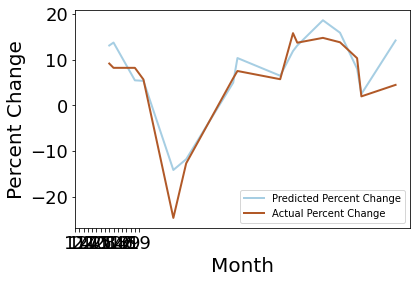

In [28]:
df_temp.plot(colormap='Paired', linewidth=2, fontsize=18)

plt.xlabel('Month', fontsize=20)
plt.ylabel('Percent Change', fontsize=20)
x = df['day'] 
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)


plt.show()

#need to find a way to fix the time series... 

In [29]:
# now lets look at it for the predicted price 

In [30]:
future_dates_temp= future_dates[['percent change']] 

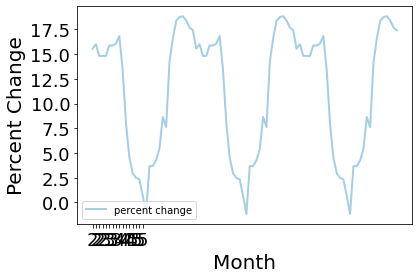

In [31]:
future_dates_temp.plot(colormap='Paired', linewidth=2, fontsize=18)

plt.xlabel('Month', fontsize=20)
plt.ylabel('Percent Change', fontsize=20)
x = df['month'] 
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)

plt.show()